In [41]:
#|!pip install jsonlines
#!pip install pandas
#!pip install transformers
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 9.2 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 92.2 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 98.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 111.9 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 50.2 MB/s eta 0:00:01


In [1]:
import jsonlines 
import pandas as pd
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm
import json
from io import StringIO
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 

In [2]:
rutas = ["/home/santiago/LanAn/aguadiana4-3_tweetsResCont.txt", "/home/santiago/LanAn/aguadiana6-4_tweetsResCont.txt", "/home/santiago/LanAn/manolojim4-3_tweetsResCont.txt", "/home/santiago/LanAn/manolojim6-4_tweetsResCont.txt", "/home/santiago/LanAn/manolojim6-5_tweetsResCont.txt", "/home/santiago/LanAn/RicardoMeb6-4_tweetsResCont.txt", "/home/santiago/LanAn/leninperezr4-3_tweetsResCont.txt", "/home/santiago/LanAn/leninperezr6-4_tweetsResCont.txt", "/home/santiago/LanAn/leninperezr6-5_tweetsResCont.txt", "/home/santiago/LanAn/AlejandraDMV4-3_tweetsResCont.txt", "/home/santiago/LanAn/AlejandraDMV6-4_tweetsResCont.txt", "/home/santiago/LanAn/delfinagomeza4-3_tweetsResCont.txt", "/home/santiago/LanAn/delfinagomeza6-4_tweetsResCont.txt", "/home/santiago/LanAn/delfinagomeza6-5_tweetsResCont.txt"]

In [3]:
df = pd.DataFrame()
for ruta in rutas:
    df = pd.concat([df, pd.read_json(ruta, lines=True)], ignore_index=True)
df

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,bookmarkCount,pinned,editState,content,outlinks,outlinksss,tcooutlinks,tcooutlinksss,username,_snscrape
0,snscrape.modules.twitter.Tweet,https://twitter.com/cjauglez/status/1643767467...,2023-04-06 00:07:58+00:00,@aguadiana Don canguro,@aguadiana Don canguro,1643767467494481925,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana Don canguro,[],,[],,cjauglez,0.6.2.20230321.dev50+g0d824ab
1,snscrape.modules.twitter.Tweet,https://twitter.com/Roberto61609862/status/164...,2023-04-05 02:37:10+00:00,@aguadiana El cambio https://t.co/qX6OreFnCW,@aguadiana El cambio https://t.co/qX6OreFnCW,1643442625922383873,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana El cambio https://t.co/qX6OreFnCW,[],,[],,Roberto61609862,0.6.2.20230321.dev50+g0d824ab
2,snscrape.modules.twitter.Tweet,https://twitter.com/cuchoalbert/status/1643387...,2023-04-04 22:56:15+00:00,@aguadiana El cambio https://t.co/mNXSDlGinx,@aguadiana El cambio https://t.co/mNXSDlGinx,1643387032310370304,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana El cambio https://t.co/mNXSDlGinx,[],,[],,cuchoalbert,0.6.2.20230321.dev50+g0d824ab
3,snscrape.modules.twitter.Tweet,https://twitter.com/Franky61529058/status/1643...,2023-04-04 21:29:52+00:00,@aguadiana Para cuando te estas alineando con ...,@aguadiana Para cuando te estas alineando con ...,1643365291630510085,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,1,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana Para cuando te estas alineando con ...,[],,[],,Franky61529058,0.6.2.20230321.dev50+g0d824ab
4,snscrape.modules.twitter.Tweet,https://twitter.com/pavzqzo/status/16431440579...,2023-04-04 06:50:46+00:00,@aguadiana gordito cochino te usaron. el deal ...,@aguadiana gordito cochino te usaron. el deal ...,1643144057953173507,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@aguadiana gordito cochino te usaron. el deal ...,[],,[],,pavzqzo,0.6.2.20230321.dev50+g0d824ab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34973,snscrape.modules.twitter.Tweet,https://twitter.com/Jesusacostamrz/status/1665...,2023-06-05 06:35:21+00:00,"@delfinagomeza Felicidades Maestra, esperemos ...","@delfinagomeza Felicidades Maestra, esperemos ...",1665608225717116934,"{'_type': 'snscrape.modules.twitter.User', 'us...",15,3,28,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,"@delfinagomeza Felicidades Maestra, esperemos ...",[],,[],,Jesusacostamrz,0.6.2.20230321.dev50+g0d824ab
34974,snscrape.modules.twitter.Tweet,https://twitter.com/AldoAV4/status/16656081791...,2023-06-05 06:35:10+00:00,"@delfinagomeza Maestra trabajé arduamente, no ...","@delfinagomeza Maestra trabajé arduamente, no ...",1665608179173019650,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,0,5,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,"@delfinagomeza Maestra trabajé arduamente, no ...",[],,[],,AldoAV4,0.6.2.20230321.dev50+g0d824ab
34975,snscrape.modules.twitter.Tweet,https://twitter.com/CerrilloRicardo/status/166...,2023-06-05 06:34:19+00:00,@delfinagomeza Se logró #DelfinaGobernadora,@delfinagomeza Se logró #DelfinaGobernadora,1665607966987255809,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,0,NaN,{'_type': 'snscrape.modules.twitter.EditState'...,@delfinagomeza Se logró #DelfinaGobernadora,[],,[],,CerrilloRicardo,0.6.2.20230321.dev50+g0d824ab
34976,snscrape.modules.twitter.Tweet,https://twitter.com/dianaayala_7/status/166560...,2023-06-05 06:33:45+00:00,@delfinagomeza En esta fiesta de la democracia...,@delfinagomeza En esta fiesta de la democracia...,1665607823382937600,"{'_type':

In [8]:
model_path = "daveni/twitter-xlm-roberta-emotion-es"
emotion_analysis = pipeline("text-classification", framework="pt", model=model_path, tokenizer=model_path)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [4]:
data = []
buffer = StringIO()

In [5]:
for i,row in tqdm(df.iterrows()):
    name = row["inReplyToUser"]
    name= str(name)
    name = name.replace("'", "\"")
    name = name.replace("None", "null")
    try:
        objeto_name = json.loads(name)
        try:
            figura = objeto_name["username"]
            try:
                json_res = emotion_analysis(row["rawContent"])
                json_res =str(json_res[0])
                json_res = json_res.replace("'", "\"");
                try:
                    obj_res = json.loads(json_res)
                    emocion = obj_res["label"]
                    porcentaje = obj_res["score"]
                    if emocion != "others":
                        data.append ({"twitt" : row["rawContent"], "emocion" :emocion, "porcentaje" : porcentaje, "figura": figura, "fecha" : row["date"]})
                except:
                    print(json_res)
            except :
                print("Error:Modelo")
        except :
            print("Error:FIGURA")
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", str(e))

0it [00:00, ?it/s]

Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo
Error:Modelo

In [6]:
df.to_csv('archivoTodo.csv', index=False)
df_final = pd.DataFrame(data)
df_final.to_csv('archivoInteres.csv', index=False)

KeyError: 'figura'

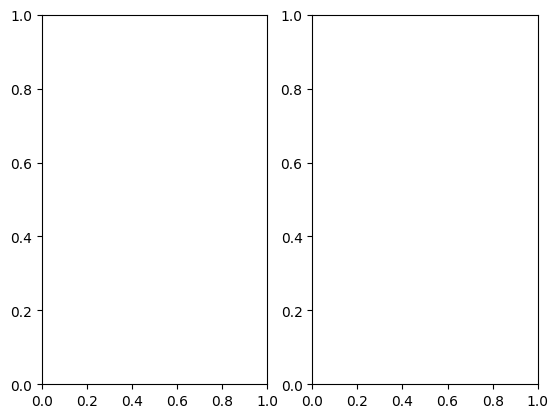

In [7]:
figs = ["aguadiana", "AlejandraDMV" ]
fig, axs = plt.subplots(1,len(figs))
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']

for j, figura in enumerate(figs):
    cuentas =  df_final[df_final["figura"] == figura]['emocion'].value_counts(normalize = True)  
    df_sorted = cuentas.sort_index(ascending=True)
    axs[j].bar( x= df_sorted.index.values, height = df_sorted.values)
    axs[j].set_title (f"Análisis de {figura}")
    axs[j].set_ylim (0.0, 0.9)
    explode = tuple([0.05 for x in df_sorted.index.values] )
    #axs[j].pie(df_sorted.values, colors=colors, labels=df_sorted.index.values,
        #autopct='%1.1f%%', pctdistance=0.85,
        #explode=explode)
    centre_circle = Circle((0, 0), 0.70, fc='white')
    #axs[j].add_patch(centre_circle)